In [0]:
%%capture
!mkdir -p ./data/fashion
!curl -L http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz -o ./data/fashion/train-images-idx3-ubyte.gz
!curl -L http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz -o ./data/fashion/train-labels-idx1-ubyte.gz
!curl -L http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz -o ./data/fashion/t10k-images-idx3-ubyte.gz
!curl -L http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz -o ./data/fashion/t10k-labels-idx1-ubyte.gz

In [0]:
%%capture
!mkdir ./utils
!curl https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/utils/mnist_reader.py -o ./utils/mnist_reader.py

# fashion-MNIST MLP demo

In [1]:
from __future__ import print_function

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

Using TensorFlow backend.


In [0]:
from utils import mnist_reader

In [3]:
batch_size = 128
num_classes = 10
epochs = 80

x_train, y_train = mnist_reader.load_mnist('./data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('./data/fashion', kind='t10k')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [0]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr_sgd = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-4)
reduce_lr_adam = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# 1. SGDW

In [0]:
from SGDW import SGDW

In [27]:
model = Sequential()
model.add(Dense(512, activation='relu', kernel_initializer='he_normal', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

b, B, T = batch_size, x_train.shape[0], epochs
wd = 0.0025 * (b/B/T)**0.5

model.compile(loss='categorical_crossentropy',
              optimizer=SGDW(weight_decay=wd, momentum=0.9),
              metrics=['accuracy'])

history0 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2, callbacks=[reduce_lr_sgd],
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/80
 - 6s - loss: 0.6846 - acc: 0.7603 - val_loss: 0.4640 - val_acc: 0.8367
Epo

Epoch 25/80
 - 6s - loss: 0.2282 - acc: 0.9161 - val_loss: 0.3031 - val_acc: 0.8931
Epoch 26/80
 - 6s - loss: 0.2256 - acc: 0.9154 - val_loss: 0.3040 - val_acc: 0.8930
Epoch 27/80
 - 6s - loss: 0.2193 - acc: 0.9180 - val_loss: 0.3056 - val_acc: 0.8918
Epoch 28/80
 - 6s - loss: 0.2177 - acc: 0.9186 - val_loss: 0.2989 - val_acc: 0.8957
Epoch 29/80
 - 6s - loss: 0.2134 - acc: 0.9199 - val_loss: 0.3058 - val_acc: 0.8915
Epoch 30/80
 - 6s - loss: 0.2101 - acc: 0.9217 - val_loss: 0.3006 - val_acc: 0.8954
Epoch 31/80
 - 6s - loss: 0.2074 - acc: 0.9236 - val_loss: 0.3015 - val_acc: 0.8944
Epoch 32/80
 - 6s - loss: 0.2043 - acc: 0.9237 - val_loss: 0.2957 - val_acc: 0.8966
Epoch 33/80
 - 6s - loss: 0.1991 - acc: 0.9259 - val_loss: 0.3047 - val_acc: 0.8926
Epoch 34/80
 - 6s - loss: 0.1969 - acc: 0.9263 - val_loss: 0.2983 - val_acc: 0.8979
Epoch 35/80
 - 6s - loss: 0.1950 - acc: 0.9271 - val_loss: 0.3036 - val_acc: 0.8936
Epoch 36/80
 - 6s - loss: 0.1930 - acc: 0.9283 - val_loss: 0.3090 - val_acc:

Epoch 59/80
 - 6s - loss: 0.1249 - acc: 0.9546 - val_loss: 0.2934 - val_acc: 0.9031
Epoch 60/80
 - 6s - loss: 0.1246 - acc: 0.9555 - val_loss: 0.2943 - val_acc: 0.9037
Epoch 61/80
 - 6s - loss: 0.1255 - acc: 0.9540 - val_loss: 0.2929 - val_acc: 0.9034
Epoch 62/80
 - 6s - loss: 0.1228 - acc: 0.9554 - val_loss: 0.2923 - val_acc: 0.9040
Epoch 63/80
 - 6s - loss: 0.1221 - acc: 0.9562 - val_loss: 0.2929 - val_acc: 0.9037
Epoch 64/80
 - 6s - loss: 0.1222 - acc: 0.9561 - val_loss: 0.2928 - val_acc: 0.9039
Epoch 65/80
 - 6s - loss: 0.1214 - acc: 0.9555 - val_loss: 0.2935 - val_acc: 0.9028
Epoch 66/80
 - 6s - loss: 0.1221 - acc: 0.9557 - val_loss: 0.2928 - val_acc: 0.9031
Epoch 67/80
 - 6s - loss: 0.1211 - acc: 0.9560 - val_loss: 0.2927 - val_acc: 0.9041
Epoch 68/80
 - 6s - loss: 0.1217 - acc: 0.9554 - val_loss: 0.2926 - val_acc: 0.9041
Epoch 69/80
 - 6s - loss: 0.1202 - acc: 0.9563 - val_loss: 0.2928 - val_acc: 0.9044
Epoch 70/80
 - 6s - loss: 0.1205 - acc: 0.9564 - val_loss: 0.2935 - val_acc:

# 2. AdamW

In [0]:
from AdamW import AdamW

In [7]:
model = Sequential()
model.add(Dense(512, activation='relu', kernel_initializer='he_normal', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

b, B, T = batch_size, x_train.shape[0], epochs
wd = 0.005 * (b/B/T)**0.5

model.compile(loss='categorical_crossentropy',
              optimizer=AdamW(weight_decay=wd),
              metrics=['accuracy'])

history1 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2, callbacks=[reduce_lr_adam],
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/80
 - 8s - loss: 0.5461 - acc: 0.8063 - val_loss: 0.4346 - val_acc: 0.8422
Epo

Epoch 25/80
 - 7s - loss: 0.1749 - acc: 0.9334 - val_loss: 0.3032 - val_acc: 0.8996
Epoch 26/80
 - 7s - loss: 0.1732 - acc: 0.9322 - val_loss: 0.3039 - val_acc: 0.8976
Epoch 27/80
 - 7s - loss: 0.1555 - acc: 0.9408 - val_loss: 0.3020 - val_acc: 0.9006
Epoch 28/80
 - 7s - loss: 0.1520 - acc: 0.9417 - val_loss: 0.3020 - val_acc: 0.9026
Epoch 29/80
 - 7s - loss: 0.1508 - acc: 0.9424 - val_loss: 0.2934 - val_acc: 0.9034
Epoch 30/80
 - 7s - loss: 0.1470 - acc: 0.9431 - val_loss: 0.3032 - val_acc: 0.9037
Epoch 31/80
 - 7s - loss: 0.1463 - acc: 0.9432 - val_loss: 0.3001 - val_acc: 0.9033
Epoch 32/80
 - 7s - loss: 0.1420 - acc: 0.9456 - val_loss: 0.3064 - val_acc: 0.9017
Epoch 33/80
 - 7s - loss: 0.1424 - acc: 0.9454 - val_loss: 0.2986 - val_acc: 0.9058
Epoch 34/80
 - 7s - loss: 0.1410 - acc: 0.9463 - val_loss: 0.3068 - val_acc: 0.9030
Epoch 35/80
 - 7s - loss: 0.1315 - acc: 0.9502 - val_loss: 0.3003 - val_acc: 0.9054
Epoch 36/80
 - 7s - loss: 0.1296 - acc: 0.9504 - val_loss: 0.2992 - val_acc:

Epoch 59/80
 - 7s - loss: 0.1252 - acc: 0.9554 - val_loss: 0.2827 - val_acc: 0.9064
Epoch 60/80
 - 7s - loss: 0.1254 - acc: 0.9551 - val_loss: 0.2831 - val_acc: 0.9052
Epoch 61/80
 - 7s - loss: 0.1250 - acc: 0.9549 - val_loss: 0.2813 - val_acc: 0.9069
Epoch 62/80
 - 7s - loss: 0.1256 - acc: 0.9555 - val_loss: 0.2807 - val_acc: 0.9080
Epoch 63/80
 - 7s - loss: 0.1256 - acc: 0.9556 - val_loss: 0.2802 - val_acc: 0.9068
Epoch 64/80
 - 7s - loss: 0.1275 - acc: 0.9551 - val_loss: 0.2809 - val_acc: 0.9070
Epoch 65/80
 - 7s - loss: 0.1277 - acc: 0.9546 - val_loss: 0.2791 - val_acc: 0.9066
Epoch 66/80
 - 7s - loss: 0.1289 - acc: 0.9549 - val_loss: 0.2804 - val_acc: 0.9066
Epoch 67/80
 - 7s - loss: 0.1282 - acc: 0.9546 - val_loss: 0.2801 - val_acc: 0.9063
Epoch 68/80
 - 7s - loss: 0.1289 - acc: 0.9542 - val_loss: 0.2808 - val_acc: 0.9066
Epoch 69/80
 - 7s - loss: 0.1292 - acc: 0.9545 - val_loss: 0.2803 - val_acc: 0.9060
Epoch 70/80
 - 7s - loss: 0.1299 - acc: 0.9547 - val_loss: 0.2785 - val_acc:

# 3. SGD

In [0]:
from keras.optimizers import SGD
from keras.layers import *

In [28]:
model = Sequential()
model.add(Dense(512, activation='relu', kernel_initializer='he_normal', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=0.9),
              metrics=['accuracy'])

history2 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2, callbacks=[reduce_lr_sgd],
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/80
 - 6s - loss: 0.6849 - acc: 0.7603 - val_loss: 0.4726 - val_acc: 0.8333
Epo

Epoch 25/80
 - 5s - loss: 0.2286 - acc: 0.9146 - val_loss: 0.3066 - val_acc: 0.8903
Epoch 26/80
 - 5s - loss: 0.2219 - acc: 0.9179 - val_loss: 0.3062 - val_acc: 0.8911
Epoch 27/80
 - 5s - loss: 0.2181 - acc: 0.9188 - val_loss: 0.3051 - val_acc: 0.8936
Epoch 28/80
 - 5s - loss: 0.2193 - acc: 0.9187 - val_loss: 0.3050 - val_acc: 0.8941
Epoch 29/80
 - 5s - loss: 0.2134 - acc: 0.9209 - val_loss: 0.2995 - val_acc: 0.8928
Epoch 30/80
 - 5s - loss: 0.2119 - acc: 0.9210 - val_loss: 0.3051 - val_acc: 0.8956
Epoch 31/80
 - 5s - loss: 0.2067 - acc: 0.9227 - val_loss: 0.3034 - val_acc: 0.8944
Epoch 32/80
 - 5s - loss: 0.2029 - acc: 0.9242 - val_loss: 0.3075 - val_acc: 0.8939
Epoch 33/80
 - 5s - loss: 0.2015 - acc: 0.9257 - val_loss: 0.3019 - val_acc: 0.8930
Epoch 34/80
 - 5s - loss: 0.1969 - acc: 0.9277 - val_loss: 0.3083 - val_acc: 0.8932
Epoch 35/80
 - 5s - loss: 0.1807 - acc: 0.9333 - val_loss: 0.2971 - val_acc: 0.9011
Epoch 36/80
 - 5s - loss: 0.1752 - acc: 0.9350 - val_loss: 0.2993 - val_acc:

Epoch 59/80
 - 5s - loss: 0.1292 - acc: 0.9529 - val_loss: 0.3018 - val_acc: 0.9028
Epoch 60/80
 - 5s - loss: 0.1293 - acc: 0.9527 - val_loss: 0.2983 - val_acc: 0.9035
Epoch 61/80
 - 5s - loss: 0.1245 - acc: 0.9554 - val_loss: 0.2986 - val_acc: 0.9039
Epoch 62/80
 - 5s - loss: 0.1274 - acc: 0.9537 - val_loss: 0.2974 - val_acc: 0.9042
Epoch 63/80
 - 5s - loss: 0.1245 - acc: 0.9547 - val_loss: 0.2968 - val_acc: 0.9037
Epoch 64/80
 - 5s - loss: 0.1239 - acc: 0.9546 - val_loss: 0.2987 - val_acc: 0.9026
Epoch 65/80
 - 5s - loss: 0.1234 - acc: 0.9553 - val_loss: 0.2988 - val_acc: 0.9035
Epoch 66/80
 - 5s - loss: 0.1235 - acc: 0.9552 - val_loss: 0.2982 - val_acc: 0.9041
Epoch 67/80
 - 5s - loss: 0.1218 - acc: 0.9555 - val_loss: 0.2995 - val_acc: 0.9041
Epoch 68/80
 - 5s - loss: 0.1245 - acc: 0.9548 - val_loss: 0.2988 - val_acc: 0.9038
Epoch 69/80
 - 5s - loss: 0.1208 - acc: 0.9554 - val_loss: 0.2990 - val_acc: 0.9041
Epoch 70/80
 - 5s - loss: 0.1208 - acc: 0.9561 - val_loss: 0.2986 - val_acc:

# 4. Adam

In [0]:
from keras.optimizers import Adam

In [13]:
model = Sequential()
model.add(Dense(512, activation='relu', kernel_initializer='he_normal', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history3 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2, callbacks=[reduce_lr_adam],
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/80
 - 7s - loss: 0.5509 - acc: 0.8038 - val_loss: 0.4276 - val_acc: 0.8484
Epo

Epoch 25/80
 - 7s - loss: 0.1696 - acc: 0.9349 - val_loss: 0.3066 - val_acc: 0.8998
Epoch 26/80
 - 7s - loss: 0.1656 - acc: 0.9357 - val_loss: 0.3143 - val_acc: 0.9004
Epoch 27/80
 - 7s - loss: 0.1619 - acc: 0.9365 - val_loss: 0.3137 - val_acc: 0.9004
Epoch 28/80
 - 7s - loss: 0.1473 - acc: 0.9429 - val_loss: 0.3132 - val_acc: 0.9043
Epoch 29/80
 - 7s - loss: 0.1415 - acc: 0.9449 - val_loss: 0.3130 - val_acc: 0.9059
Epoch 30/80
 - 7s - loss: 0.1393 - acc: 0.9465 - val_loss: 0.3203 - val_acc: 0.9041
Epoch 31/80
 - 7s - loss: 0.1385 - acc: 0.9464 - val_loss: 0.3181 - val_acc: 0.9031
Epoch 32/80
 - 7s - loss: 0.1366 - acc: 0.9475 - val_loss: 0.3235 - val_acc: 0.9024
Epoch 33/80
 - 7s - loss: 0.1264 - acc: 0.9507 - val_loss: 0.3209 - val_acc: 0.9042
Epoch 34/80
 - 7s - loss: 0.1238 - acc: 0.9523 - val_loss: 0.3248 - val_acc: 0.9048
Epoch 35/80
 - 7s - loss: 0.1228 - acc: 0.9532 - val_loss: 0.3232 - val_acc: 0.9045
Epoch 36/80
 - 7s - loss: 0.1205 - acc: 0.9541 - val_loss: 0.3259 - val_acc:

Epoch 59/80
 - 7s - loss: 0.1057 - acc: 0.9591 - val_loss: 0.3418 - val_acc: 0.9073
Epoch 60/80
 - 7s - loss: 0.1031 - acc: 0.9607 - val_loss: 0.3425 - val_acc: 0.9062
Epoch 61/80
 - 7s - loss: 0.1038 - acc: 0.9599 - val_loss: 0.3417 - val_acc: 0.9061
Epoch 62/80
 - 7s - loss: 0.1038 - acc: 0.9607 - val_loss: 0.3420 - val_acc: 0.9061
Epoch 63/80
 - 7s - loss: 0.1039 - acc: 0.9601 - val_loss: 0.3429 - val_acc: 0.9070
Epoch 64/80
 - 7s - loss: 0.1043 - acc: 0.9600 - val_loss: 0.3419 - val_acc: 0.9064
Epoch 65/80
 - 7s - loss: 0.1029 - acc: 0.9608 - val_loss: 0.3431 - val_acc: 0.9067
Epoch 66/80
 - 7s - loss: 0.1033 - acc: 0.9597 - val_loss: 0.3438 - val_acc: 0.9067
Epoch 67/80
 - 7s - loss: 0.1036 - acc: 0.9600 - val_loss: 0.3421 - val_acc: 0.9064
Epoch 68/80
 - 7s - loss: 0.1045 - acc: 0.9597 - val_loss: 0.3428 - val_acc: 0.9066
Epoch 69/80
 - 7s - loss: 0.1034 - acc: 0.9597 - val_loss: 0.3435 - val_acc: 0.9060
Epoch 70/80
 - 7s - loss: 0.1028 - acc: 0.9607 - val_loss: 0.3434 - val_acc:

# 5. Adam w/ L2(3e-5)

In [14]:
from keras.layers import *

model = Sequential()
model.add(Dense(512, activation='relu', kernel_initializer='he_normal', input_shape=(784,), kernel_regularizer=regularizers.l2(3e-5)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(3e-5)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history4 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2, callbacks=[reduce_lr_adam],
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/80
 - 8s - loss: 0.5770 - acc: 0.8032 - val_loss: 0.4515 - val_acc: 0.8455
Epo

Epoch 25/80
 - 7s - loss: 0.2369 - acc: 0.9276 - val_loss: 0.3475 - val_acc: 0.8936
Epoch 26/80
 - 8s - loss: 0.2369 - acc: 0.9280 - val_loss: 0.3464 - val_acc: 0.8936
Epoch 27/80
 - 8s - loss: 0.2347 - acc: 0.9273 - val_loss: 0.3511 - val_acc: 0.8940
Epoch 28/80
 - 7s - loss: 0.2293 - acc: 0.9294 - val_loss: 0.3502 - val_acc: 0.8951
Epoch 29/80
 - 7s - loss: 0.2132 - acc: 0.9359 - val_loss: 0.3426 - val_acc: 0.8982
Epoch 30/80
 - 8s - loss: 0.2103 - acc: 0.9375 - val_loss: 0.3452 - val_acc: 0.9018
Epoch 31/80
 - 7s - loss: 0.2064 - acc: 0.9387 - val_loss: 0.3435 - val_acc: 0.8986
Epoch 32/80
 - 8s - loss: 0.2032 - acc: 0.9391 - val_loss: 0.3453 - val_acc: 0.8987
Epoch 33/80
 - 7s - loss: 0.2014 - acc: 0.9403 - val_loss: 0.3491 - val_acc: 0.8985
Epoch 34/80
 - 8s - loss: 0.1915 - acc: 0.9438 - val_loss: 0.3397 - val_acc: 0.9016
Epoch 35/80
 - 8s - loss: 0.1892 - acc: 0.9449 - val_loss: 0.3435 - val_acc: 0.9000
Epoch 36/80
 - 8s - loss: 0.1871 - acc: 0.9458 - val_loss: 0.3424 - val_acc:

Epoch 59/80
 - 7s - loss: 0.1598 - acc: 0.9557 - val_loss: 0.3509 - val_acc: 0.9031
Epoch 60/80
 - 8s - loss: 0.1599 - acc: 0.9558 - val_loss: 0.3500 - val_acc: 0.9030
Epoch 61/80
 - 7s - loss: 0.1584 - acc: 0.9563 - val_loss: 0.3510 - val_acc: 0.9038
Epoch 62/80
 - 7s - loss: 0.1608 - acc: 0.9552 - val_loss: 0.3504 - val_acc: 0.9038
Epoch 63/80
 - 7s - loss: 0.1589 - acc: 0.9561 - val_loss: 0.3508 - val_acc: 0.9033
Epoch 64/80
 - 7s - loss: 0.1580 - acc: 0.9566 - val_loss: 0.3506 - val_acc: 0.9033
Epoch 65/80
 - 7s - loss: 0.1593 - acc: 0.9569 - val_loss: 0.3512 - val_acc: 0.9029
Epoch 66/80
 - 8s - loss: 0.1586 - acc: 0.9563 - val_loss: 0.3515 - val_acc: 0.9033
Epoch 67/80
 - 7s - loss: 0.1574 - acc: 0.9564 - val_loss: 0.3521 - val_acc: 0.9027
Epoch 68/80
 - 8s - loss: 0.1580 - acc: 0.9553 - val_loss: 0.3518 - val_acc: 0.9030
Epoch 69/80
 - 7s - loss: 0.1579 - acc: 0.9564 - val_loss: 0.3514 - val_acc: 0.9035
Epoch 70/80
 - 7s - loss: 0.1584 - acc: 0.9564 - val_loss: 0.3523 - val_acc:

# Plot results

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def plot_history(hists, attribute='val_loss', axis=(-1,81,0.85,0.99), loc='lower right'):
    ylabel = {'oss': 'loss', 'acc': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_acc': 'valid. accuracy', 'acc': 'trn._ accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(6, 4))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(ylabel[attribute[-3:]])  
    plt.xlabel('epoch')  
    plt.legend(['SGDW', 'AdamW', 'SGD w/o L2', 'Adam w/o L2', 'Adam(L2=3e-5)'], loc=loc)  

    plt.show()

In [0]:
hists = [history0, history1, history2, history3, history4]

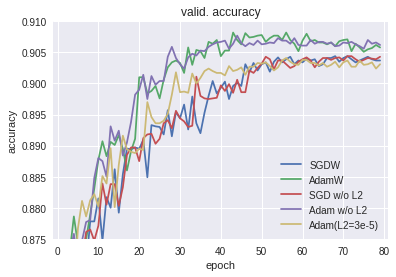

In [30]:
plot_history(hists, attribute='val_acc', axis=(-1,81,0.875,0.91), loc='lower right')

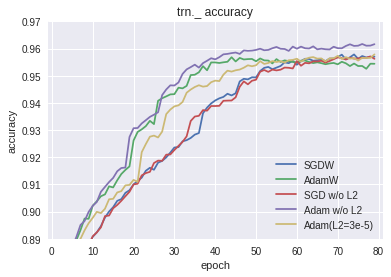

In [36]:
plot_history(hists, attribute='acc', axis=(-1,81,0.89,0.97), loc='lower right')

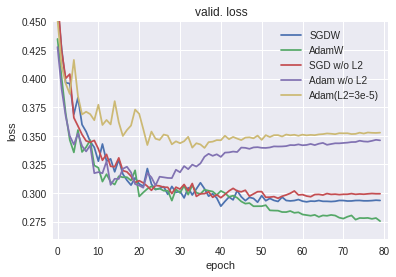

In [37]:
plot_history(hists, attribute='val_loss', axis=(-1,81,0.26,0.45), loc='upper right')

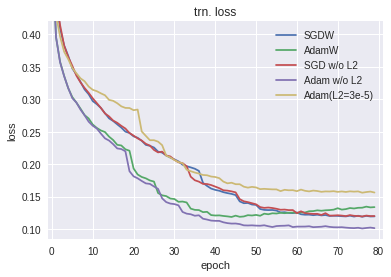

In [38]:
plot_history(hists, attribute='loss', axis=(-1,81,0.085,0.42), loc='upper right')